<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [39]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [42]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [26]:
Freedom[Freedom == 155]

153    155.0
Name: Freedom, dtype: float64

In [10]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [44]:
df.loc[150:155]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
150,Yemen,151,85,153.0,75.0,100.0,147.0,83.0,155.0,141.0,124.0
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0
155,South Sudan,156,140,127.0,152.0,148.0,154.0,61.0,85.0,140.0,143.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

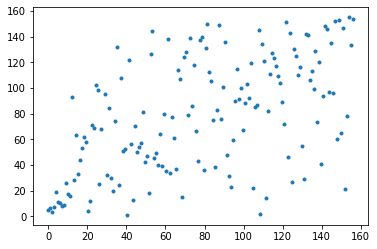

In [5]:
len_column = len(df['Freedom']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, df['Freedom'], marker='.')

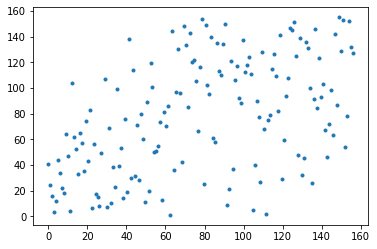

In [6]:
len_column = len(df['Positive affect']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, df['Positive affect'], marker='.')

**Ответ**: Данный вид распределения больше похож на равномерное рапределение!

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [51]:
print('Математическое ожидание для колонки Freedom',df['Freedom'].mean())

Математическое ожидание для колонки Freedom 78.0


In [20]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [21]:
print('Значение моды: ', statistics.mode(Freedom))

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду?

**Мода не может быть вычислен так как в данном столбцу все значения уникальны!**

In [45]:
print('Максимальное значение для колонки Freedom',df['Freedom'].max())

Максимальное значение для колонки Freedom 155.0


In [46]:
print('Минимальное значение для колонки Freedom',df['Freedom'].min())

Минимальное значение для колонки Freedom 1.0


In [48]:
print('Размах значений для колонки Freedom',df['Freedom'].max()-df['Freedom'].min())

Размах значений для колонки Freedom 154.0


In [49]:
print('Стандартное отклонение для значений колонки Freedom',df['Freedom'].std())

Стандартное отклонение для значений колонки Freedom 44.88875137492688


In [50]:
print('Дисперсия значений колонки Freedom',df['Freedom'].std()**2)

Дисперсия значений колонки Freedom 2015.0000000000002


**Исодя из диаграммы рассеяния признака Freedom выбросов нет**

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

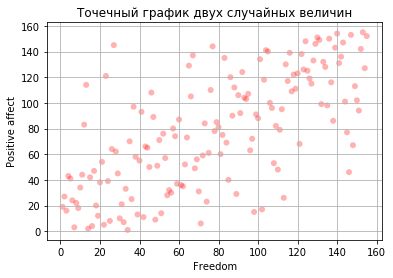

In [8]:
Freedom = df['Freedom']
Positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(Freedom, Positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график двух случайных величин')
plt.show()

In [57]:
df_filter = df[['Freedom','Positive affect']]
corr = df_filter.corr(method="pearson")
corr

,Freedom,Positive affect
Freedom,1.00000,0.68177
Positive affect,0.68177,1.00000


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [62]:
mean_Freedom = df['Freedom'].mean()
print(mean_Freedom)

78.0


In [65]:
Freedom = df['Freedom'] - df['Freedom'].mean()
print(Freedom.mean())

0.0


In [66]:
min(Freedom)

-77.0

In [67]:
max(Freedom)

77.0

In [70]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_norm = min_max_scaler.fit_transform(np.array(Freedom).reshape(-1, 1))
print(min(Freedom_norm))
print(max(Freedom_norm))

[-1.]
[1.]


C:\Users\Kosmo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Kosmo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


Построить матрицу корреляций для всех колонок таблицы

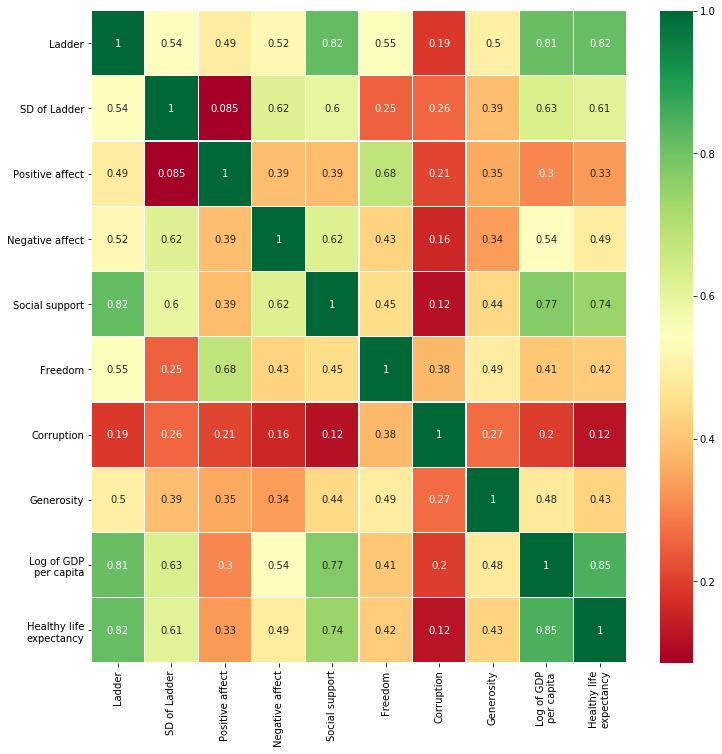

In [58]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [80]:
df_avocado=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение? **Ответ**: Смещенное влево нормальное распределение

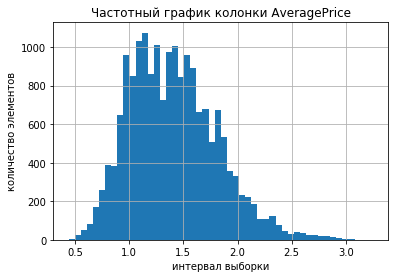

In [81]:
y = df_avocado['AveragePrice']
plt.hist(y,50)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график колонки AveragePrice')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?


**Ответ:** Колонки 4046, 4225, 4770 сильно взаимнокорелируют, но на среднюю цену практически не оказывают влияния

In [87]:
df_avocado_filter = df_avocado[['4046','4225','4770','AveragePrice']]

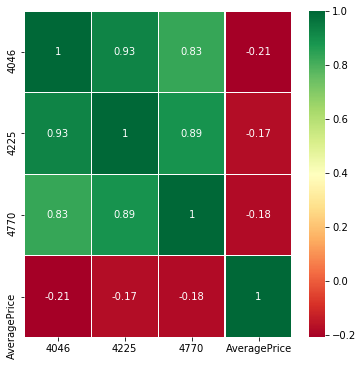

In [88]:
sns.heatmap(df_avocado_filter.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(6,6)
plt.show()